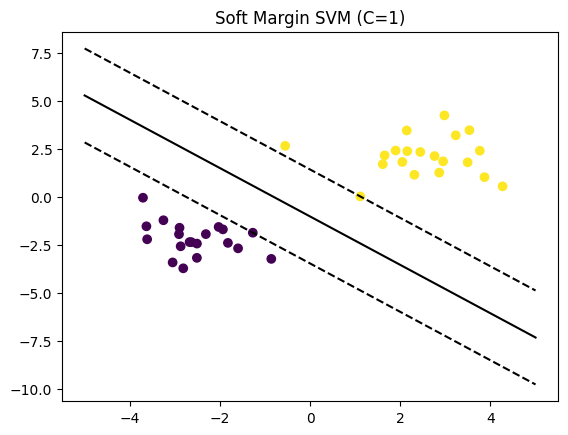

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create noisy data (not perfectly separable)
np.random.seed(0)
X1 = np.random.randn(20, 2) + [2, 2]
X2 = np.random.randn(20, 2) + [-2, -2]
X = np.vstack((X1, X2))
y = np.hstack((np.ones(20), -np.ones(20)))

# Soft Margin SVM with C = 1
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Plot boundary
w = model.coef_[0]
b = model.intercept_[0]

x_plot = np.linspace(-5, 5, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# Margins
margin = 1 / np.linalg.norm(w)
y_margin_up = y_plot + np.sqrt(1 + (w[0]/w[1])**2) * margin
y_margin_down = y_plot - np.sqrt(1 + (w[0]/w[1])**2) * margin

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x_plot, y_plot, 'k-')
plt.plot(x_plot, y_margin_up, 'k--')
plt.plot(x_plot, y_margin_down, 'k--')
plt.title("Soft Margin SVM (C=1)")
plt.show()